In [1]:
# Libraries:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from data import SINDy_data
from data import data
from data import equations

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from toolbox.auxiliary_functions import SRT_simulation, D_CODE_simulation, set_param_freq

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE & settings:
ode_name = 'HillODE' # help="name of the ode", type=str
ode_param = '3,1,1,0.1' # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # help="sampling frequency", type=float, default=10
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
seed = 100 # help="random seed", type=int, default=0
n_seed = 1 # help="random seed", type=int, default=10

ode_param, freq = set_param_freq(ode_param, freq)

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
dim_x = 2
dim_k = 0
time_vector = np.arange(0, ode.T + dt, dt)
T = ode.T

(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']


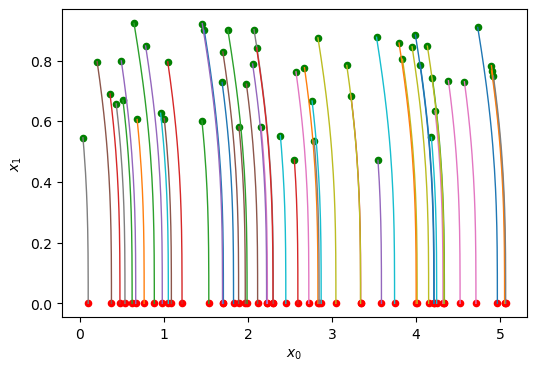

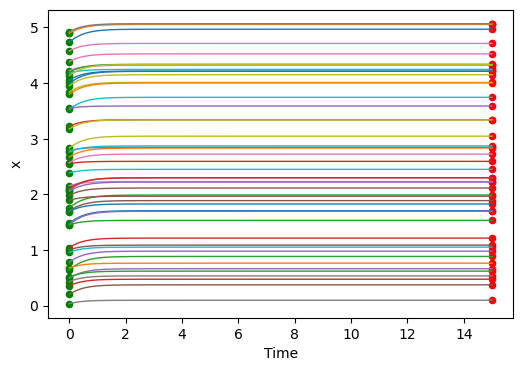

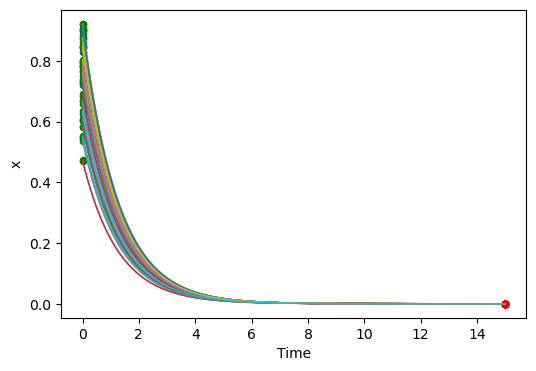

In [9]:
# Generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, 0, dim_x, dim_k)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:1], ode.T)
SINDy_data.plot_configuration(np.array(X_list)[:,:,1:2], ode.T)

In [3]:
# running SR-T:
building_blocks_lambda0, function_names0 = SRT_simulation(ode_name, ode_param, 0, freq, n_sample, noise_ratio, alg='tv', seed=seed, n_seed=n_seed, T=10)
# building_blocks_lambda1, function_names1 = SRT_simulation(ode_name, ode_param, 1, freq, n_sample, noise_ratio, alg='tv', seed=seed, n_seed=n_seed, T=T)
None

Running with: ode_name=HillODE, ode_param=[3.0, 1.0, 1.0, 0.1], x_id=0, freq=10, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
Dataset shape:  (101, 50, 2)
Functions set:  {'neg': 1, 'mul': 1, 'pow': 1, 'add': 1, 'div': 1, 'sin': 1, 'log': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.05       2.0004e+06        6        0.0351026          0.03559      3.53m


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)


   1     4.82          8359.75        8        0.0278615        0.0271503      3.36m
   2     4.08          35.8622        8        0.0122993        0.0120415      3.30m
   3     5.31          17.8886        9       0.00977033       0.00992752      2.91m
   4     4.97          11.6726        9       0.00968448        0.0107001      2.90m
   5     3.55          57.4182        8        0.0121726        0.0131817      2.58m
   6     4.02            26.63        5        0.0197486        0.0209951      2.15m
   7     4.94          24.4994        5        0.0197177        0.0216643      2.29m
   8     5.03          24.4263        7        0.0144269        0.0141913      2.20m

SR-T model:  log(C + X1**C)

building blocks:
log(X1 + 0.6247710893626453)
log(X1 + 0.65286077334289485)
0.50459418407279296*X1
X1**1.1048090950354434 + 0.6247710893626453
 
number of building blocks:  4
 


In [4]:
# running D-CODE
building_blocks_lambda0, function_names0 = D_CODE_simulation(ode_name, ode_param, 0, freq, n_sample, noise_ratio, seed=seed, n_seed=n_seed, T=T)
# building_blocks_lambda1, function_names1 = D_CODE_simulation(ode_name, ode_param, 1, freq, n_sample, noise_ratio, seed=seed, n_seed=n_seed, T=T)

Running with: ode_name=HillODE, ode_param=[3.0, 1.0, 1.0, 0.1], x_id=0, freq=10, n_sample=50, noise_sigma=0.01, seed=100, n_seed=1
Dataset shape:  (301, 50, 2)
Functions set:  {'neg': 1, 'mul': 1, 'pow': 1, 'add': 1, 'div': 1, 'sin': 1, 'log': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.05      3.37063e+21        6         0.330432         0.450683      3.19m
   1     7.14       1.3453e+12        6         0.332886         0.428595      3.56m
   2     6.27      5.09472e+09        8         0.182817          0.23323      3.10m
 
promising programs:
sin(sin(mul(mul(X1, X1), log(1.713))))
sin(sin(mul(mul(X1, X1), log(1.713))))
mul(log(add(log(2.151), X1)), sin(X1))
mul(log(add(log(2.151), X1)), sin(X1))
mul(log(add(log(2.151), X1)), sin(X1))
sin(sin(mul(log(add(log(2.151), X1